# 1. Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

# 2. Load Data

In [2]:
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

# 3. Undertanding the Data

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
num_col = churn_data.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = churn_data.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical columns: 
 Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [7]:
churn_data.shape

(10000, 13)

# 4. Data pre - processing

In [8]:
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [9]:
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [10]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [11]:
churn_data_encoded = Gender_dummies
churn_data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# 5. Exploratory Data Analysis

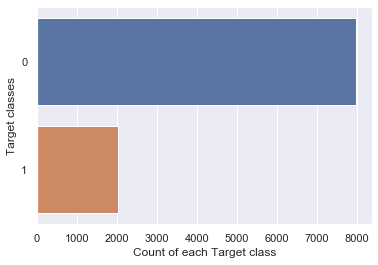

In [12]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

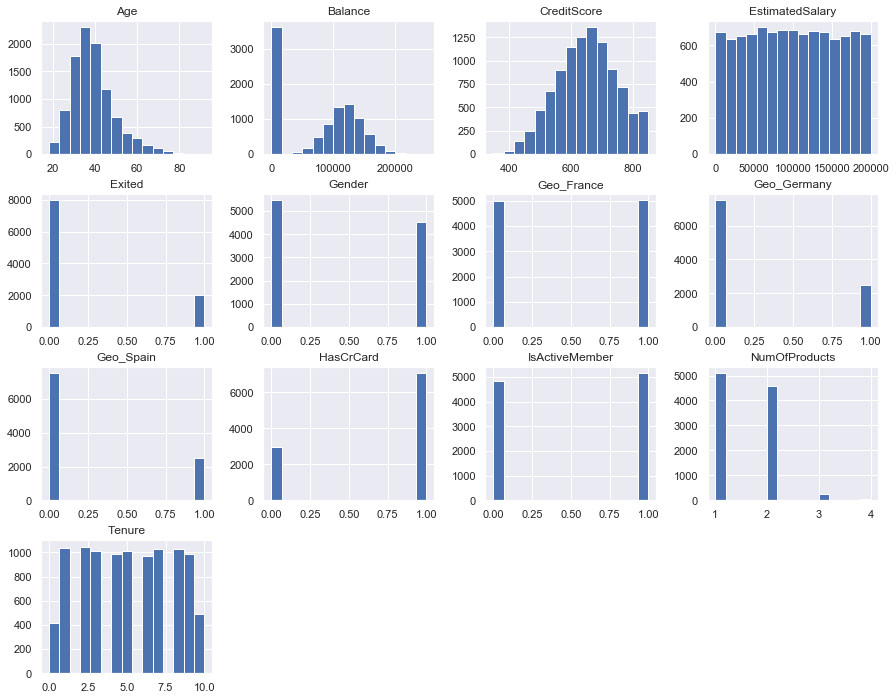

In [13]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

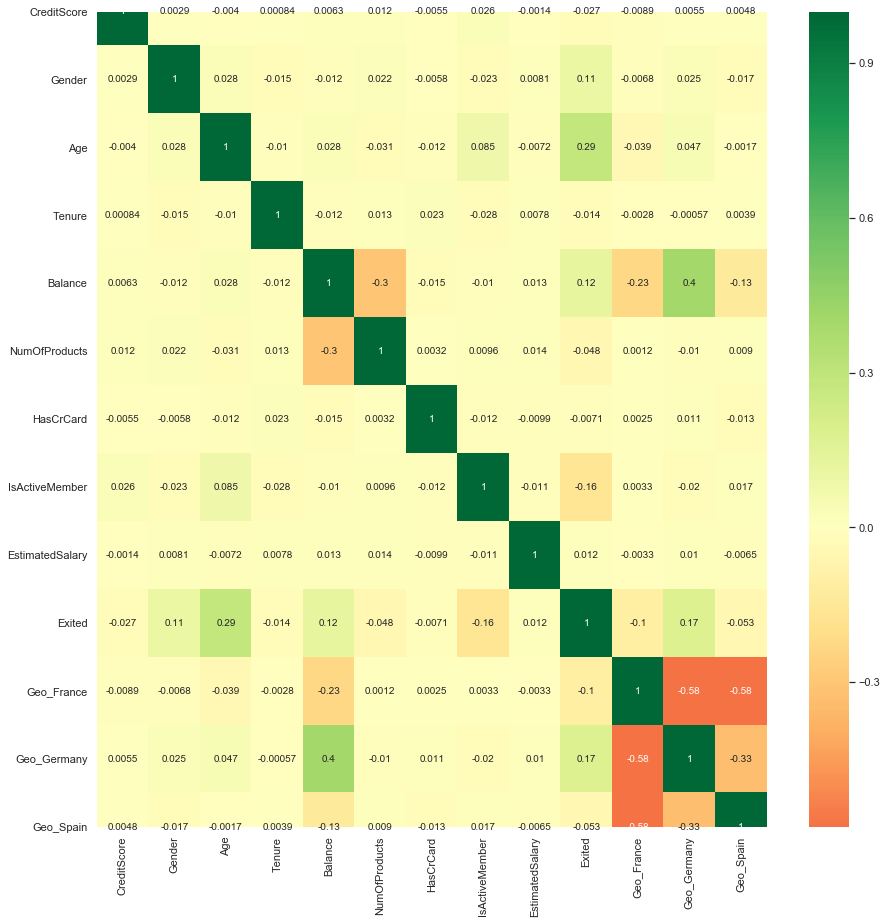

In [14]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

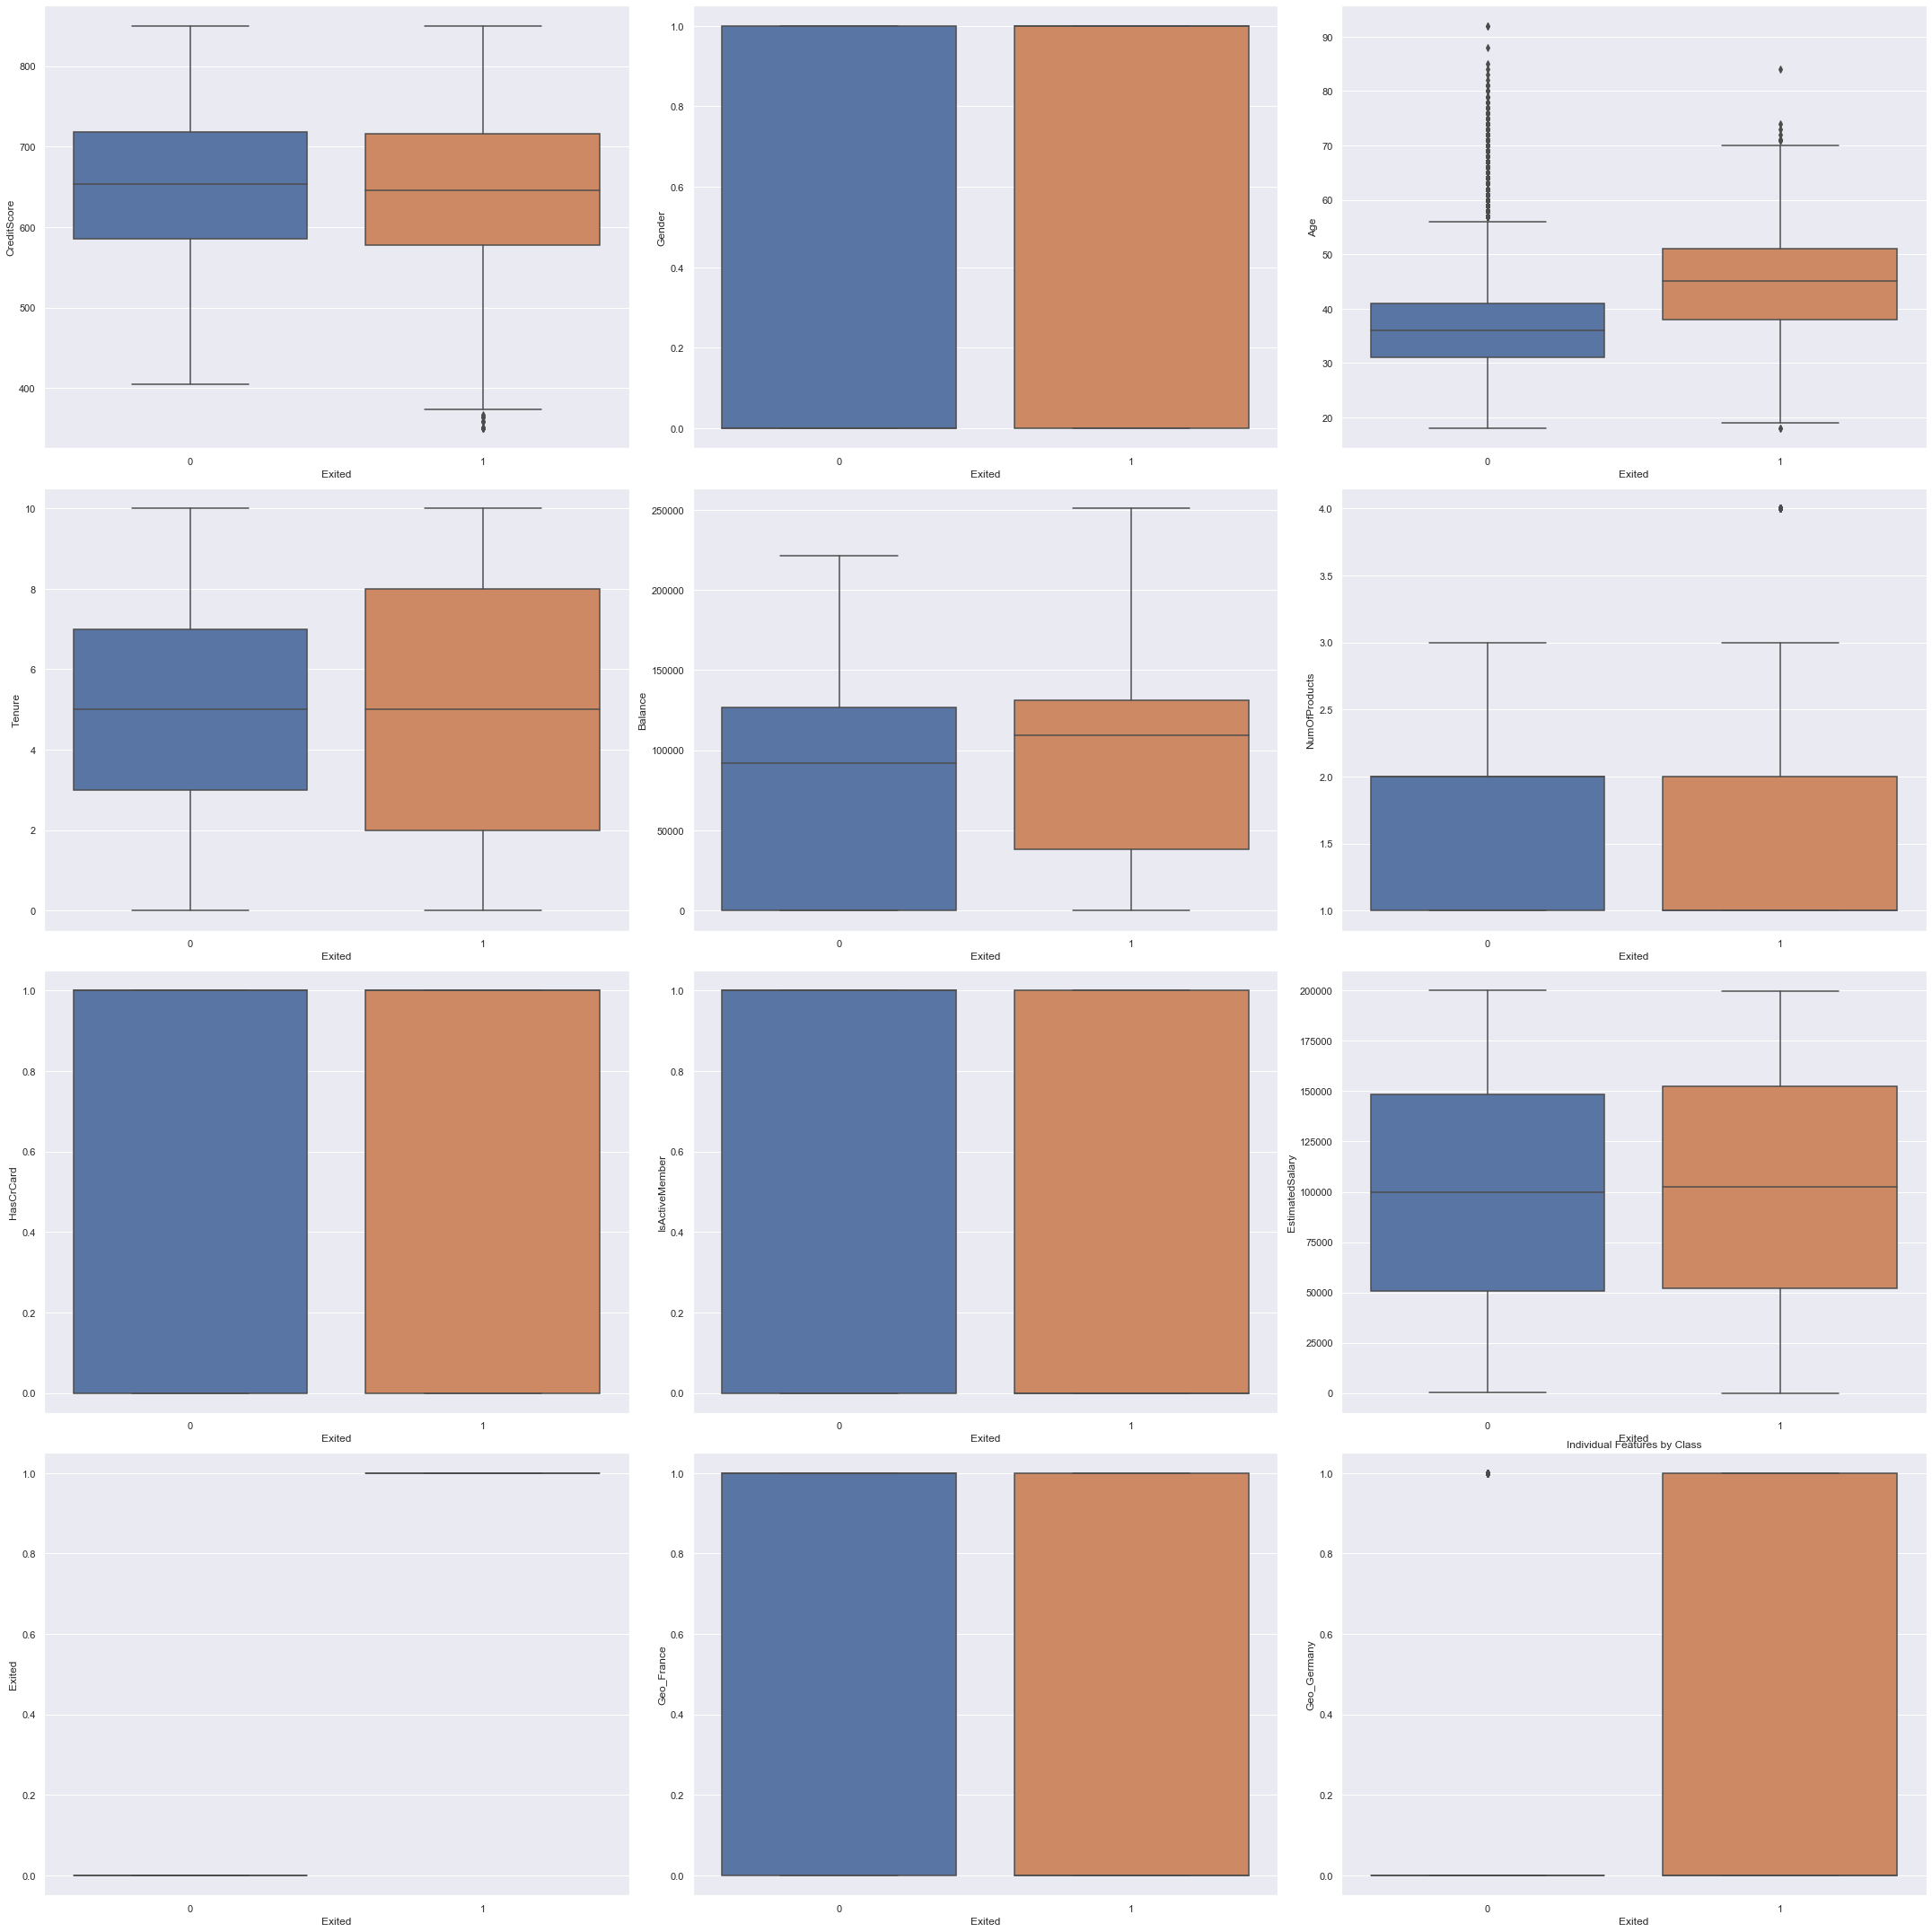

In [15]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

# 6. Model Building

In [16]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Classification

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

# 7. Predictions and Performance Metric

In [20]:
y_pred = lr.predict(X_test)

lr_probs = lr.predict_proba(X_test)

y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### 1. Accuracy

In [21]:
score_lr = lr.score(X_test, y_test)
print(score_lr)

0.8075757575757576


<a id="1"></a> <br>
### 2. Confusion Metric

In [22]:
actual = y_test
predicted = y_pred 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[2511  106]
 [ 529  154]]


<a id="2"></a> <br>
### 3. Accuracy Precision Recall F1 Score

In [23]:
print (classification_report(actual, predicted) )

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2617
           1       0.59      0.23      0.33       683

    accuracy                           0.81      3300
   macro avg       0.71      0.59      0.61      3300
weighted avg       0.78      0.81      0.77      3300



# 8. Handle Class Imbalance

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE

X = churn_data_encoded.drop(['Exited'], axis = 1)
y = churn_data_encoded.Exited

ros = SMOTE()
X_ros, y_ros = ros.fit_sample(X, y)

y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [25]:
def classification_model(X,y,class_weight = None):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    lr = LogisticRegression(class_weight = class_weight)

    
    lr.fit(X_train, y_train)

    
    y_pred0 = lr.predict(X_test)
    lr_probs = lr.predict_proba(X_test)
    
    results = confusion_matrix(y_test, y_pred0) 


    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(y_test, y_pred0) )
    print ('Report : ')
    print (classification_report(y_test, y_pred0))
    
def performance_metric(actual,predicted):
    
    results = confusion_matrix(actual, predicted) 


    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(actual, predicted) )
    print ('Report : ')
    print (classification_report(actual, predicted))

In [26]:
classification_model(X_ros,y_ros)

Confusion Matrix :
[[2224  400]
 [ 540 2092]]
Accuracy Score : 0.8211567732115678
Report : 
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      2624
           1       0.84      0.79      0.82      2632

    accuracy                           0.82      5256
   macro avg       0.82      0.82      0.82      5256
weighted avg       0.82      0.82      0.82      5256

